# Final Project: Fantansy Football Tool 

In this project, we will build a fantasy football tool that quickly let's us analyze the performance of any running back.

In the cell below import pandas, matplotlib and sqldf

In [170]:
#Import relevant packages
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

Enter the running back player you would like to analyze below in the cell below as a string. If you don't know a running back use DeMarco Murray.

In [171]:
#player_name = "LeVeon Bell"
player_name = "DeMarco Murray"
#player_name = "Arian Foster"
#player_name = "C.J. Anderson"

Read in the data from nflteams.csv, nflgames.csv, nflplayers.csv, and rushingstats.csv into dataframes 

In [172]:
#Read in the data
teams = pd.read_csv("Data/nflteams.csv", index_col = 0)
games = pd.read_csv("Data/nflgames.csv", index_col = 0)
players = pd.read_csv("Data/nflplayers.csv", index_col = 0)
rushing_stats = pd.read_csv("Data/rushingstats.csv", index_col = 0)

Get the PlayerID and TeamID corresponding to the above inputted player.

In [173]:
#Get the IDs for the given 
sqldf("SELECT PlayerID, PlayerName, TeamID FROM players WHERE PlayerName = '%s'" % player_name)

,PlayerID,PlayerName,TeamID
0,79,DeMarco Murray,5


Now pick out the rushing yards (Yds) and GameID for this player only for this player over all of his games.

In [174]:
#Get the stats only for this player
info_1 = sqldf("SELECT B.PlayerID, B.PlayerName, B.TeamID, A.Yds AS 'Rushing_Yards', A.GameID FROM rushing_stats AS A \
JOIN players AS B ON A.PlayerID=B.PlayerID \
WHERE B.PlayerName = '%s'" % player_name)
info_1

,PlayerID,PlayerName,TeamID,Rushing_Yards,GameID
0,79,DeMarco Murray,5,73,47
1,79,DeMarco Murray,5,118,48
2,79,DeMarco Murray,5,167,49
3,79,DeMarco Murray,5,100,50
4,79,DeMarco Murray,5,149,51
5,79,DeMarco Murray,5,136,52
6,79,DeMarco Murray,5,115,53
7,79,DeMarco Murray,5,128,54
8,79,DeMarco Murray,5,141,55
9,79,DeMarco Murray,5,79,56


Join this with the games table to get the Week and Opponent teams ID.

In [179]:
#Get week and opponenent ID
info_2 = sqldf("SELECT A.PlayerID, A.TeamID, A.GameID, A.Rushing_Yards, B.Week,\
CASE WHEN B.HomeTeamID = A.TeamID THEN B.AwayTeamID ELSE B.HomeTeamID END AS Opponent_Team_ID \
FROM info_1 AS A \
JOIN games AS B ON A.GameID = B.GameID")
info_2 

,PlayerID,TeamID,GameID,Rushing_Yards,Week,Opponent_Team_ID
0,79,5,47,73,13,4
1,79,5,48,118,1,16
2,79,5,49,167,2,12
3,79,5,50,100,3,18
4,79,5,51,149,4,22
5,79,5,52,136,5,13
6,79,5,53,115,6,23
7,79,5,54,128,7,14
8,79,5,55,141,8,8
9,79,5,56,79,9,17


Join this with the teams dataframe to get the opponent abbreviation.  Also sort ascending by week.

In [180]:
game_result = sqldf("SELECT A.*, B.Teamabrv AS 'Team_Abbreviation' FROM info_2 AS A \
JOIN teams AS B ON A.Opponent_Team_ID = B.TeamID \
ORDER BY A.Week ASC")
game_result

,PlayerID,TeamID,GameID,Rushing_Yards,Week,Opponent_Team_ID,Team_Abbreviation
0,79,5,48,118,1,16,sfo
1,79,5,49,167,2,12,oti
2,79,5,50,100,3,18,ram
3,79,5,51,149,4,22,nor
4,79,5,52,136,5,13,htx
5,79,5,53,115,6,23,sea
6,79,5,54,128,7,14,nyg
7,79,5,55,141,8,8,was
8,79,5,56,79,9,17,crd
9,79,5,57,100,10,6,jax


Now we create a line plot showing the yards gained over each week.

Text(0.5, 0.98, 'Yards Gained over Each Week for DeMarco Murray')

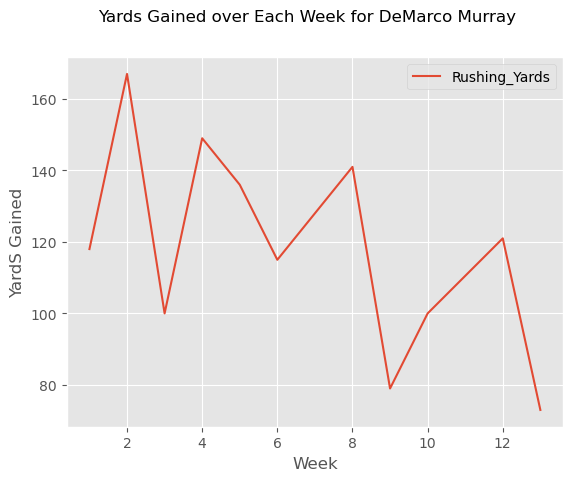

In [181]:
%matplotlib inline

#Set to ggplot style
fig1, ax1 = plt.subplots()

#Create figure and axis
game_result.plot(kind="line", x = "Week", y = "Rushing_Yards", ax = ax1)
ax1.set_ylabel("YardS Gained")

#Add titles
fig1.suptitle("Yards Gained over Each Week for %s"% player_name)